In [ ]:
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

import nltk
nltk.download('wordnet')

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/informationRetrieval /scholar1.csv', error_bad_lines=False);
data_text = data[['title']]
data_text['index'] = data_text.index
documents = data_text

documents = documents.dropna(subset=['title'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data

,author_name,discipline,title,year
0,David Waugh,Reader/Associate Professor at,Laser surface engineering: processes and appli...,2014
1,David Waugh,Reader/Associate Professor at,Interaction of CO2 laser-modified nylon with o...,2009
2,David Waugh,Reader/Associate Professor at,On the use of CO2 laser induced surface patter...,2010
3,David Waugh,Reader/Associate Professor at,On the effects of using CO2 and F2 lasers to m...,2010
4,David Waugh,Reader/Associate Professor at,Wettability and osteoblast cell response modul...,2011
...,...,...,...,...
11520,Ian M Marshall,Verified email at coventry.ac.uk,Multimedia courseware cost modelling,1994
11521,Ian M Marshall,Verified email at coventry.ac.uk,A flexible telemedicine framework for the cont...,2008
11522,Ian M Marshall,Verified email at coventry.ac.uk,"Air pollution in Bangalore, India: an eight-ye...",2016
11523,Ian M Marshall,Verified email at coventry.ac.uk,Evaluating courseware development effort estim...,1996


In [ ]:
len(documents)


11523

In [ ]:
documents[:5]

,title,index
0,Laser surface engineering: processes and appli...,0
1,Interaction of CO2 laser-modified nylon with o...,1
2,On the use of CO2 laser induced surface patter...,2
3,On the effects of using CO2 and F2 lasers to m...,3
4,Wettability and osteoblast cell response modul...,4


In [ ]:
print(WordNetLemmatizer().lemmatize('went', pos='v'))

go


In [ ]:
stemmer = SnowballStemmer('english')
original_words = ['using', 'Based', 'learning', 'Studing', 'Analysing','Developed', 'Designed', 'Reviewing', 
           'Modelling', 'Approching', 'stating','sensational', 
           'Conventional ', 'reference', 'Effected','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles})

,original word,stemmed
0,using,use
1,Based,base
2,learning,learn
3,Studing,stude
4,Analysing,analys
5,Developed,develop
6,Designed,design
7,Reviewing,review
8,Modelling,model
9,Approching,approch


In [ ]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
doc_sample = documents[documents['index'] == 311].values[0][0]

print('Original Title: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n Tokenized and Lemmatized Title: ')
print(preprocess(doc_sample))


Original Title: 
['Host', 'Digestion', 'to', 'Determine', 'Populations', 'of', 'the', 'Northern', 'Fowl', 'Mite,', '']


 Tokenized and Lemmatized Title: 
['host', 'digest', 'determin', 'popul', 'northern', 'fowl', 'mite']


In [ ]:
doc_sample1 = documents[documents['index'] == 4311].values[0][0]

print('Original Title: ')
words = []
for word in doc_sample1.split(' '):
    words.append(word)
print(words)
print('\n\n Tokenized and Lemmatized Title: ')
print(preprocess(doc_sample1))


Original Title: 
['Psychometric', 'analysis', 'of', 'a', 'proposed', 'model', 'to', 'determine', 'factors', 'influencing', 'selection', 'of', 'a', 'research', 'supervisor']


 Tokenized and Lemmatized Title: 
['psychometr', 'analysi', 'propos', 'model', 'determin', 'factor', 'influenc', 'select', 'research', 'supervisor']


In [ ]:
processed_docs = documents['title'].map(preprocess)

In [ ]:
processed_docs

0                  [laser, surfac, engin, process, applic]
1        [interact, laser, modifi, nylon, osteoblast, c...
2        [laser, induc, surfac, pattern, modifi, wettab...
3        [effect, laser, modifi, wettabl, polymer, biom...
4        [wettabl, osteoblast, cell, respons, modul, la...
                               ...                        
11520                 [multimedia, coursewar, cost, model]
11521    [flexibl, telemedicin, framework, continu, upk...
11522      [pollut, bangalor, india, year, trend, analysi]
11523    [evalu, coursewar, develop, effort, estim, mea...
11524    [multimedia, coursewar, mind, qualiti, cost, d...
Name: title, Length: 11523, dtype: object

**Bag of words**

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)

In [ ]:
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 applic
1 engin
2 laser
3 process
4 surfac
5 cell
6 interact
7 modifi
8 nylon
9 osteoblast
10 relat


In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4311]

[(175, 1), (260, 1), (278, 1), (359, 1), (864, 1), (992, 1), (1003, 1)]

In [ ]:
bow_doc_4311 = bow_corpus[4311]

for i in range(len(bow_doc_4311)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4311[i][0], 
                                                     dictionary[bow_doc_4311[i][0]], 
                                                     bow_doc_4311[i][1]))

Word 175 ("studi") appears 1 time.
Word 260 ("case") appears 1 time.
Word 278 ("univers") appears 1 time.
Word 359 ("practic") appears 1 time.
Word 864 ("privat") appears 1 time.
Word 992 ("languag") appears 1 time.
Word 1003 ("english") appears 1 time.


**TF-IDF**

In [ ]:
from gensim import corpora, models

tfidf = models.TfidfModel(bow_corpus)

In [ ]:
corpus_tfidf = tfidf[bow_corpus]

In [ ]:
from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.40230778715726034),
 (1, 0.47684065620662147),
 (2, 0.4509984201029842),
 (3, 0.4291479665051866),
 (4, 0.472444579702363)]


**Running LDA using Bag of Words**

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                       num_topics=10,
                                       id2word=dictionary,
                                       passes=2,
                                       workers=2)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.017*"evalu" + 0.013*"studi" + 0.010*"health" + 0.009*"laser" + 0.009*"stress" + 0.008*"review" + 0.008*"africa" + 0.008*"effect" + 0.008*"digit" + 0.007*"model"
Topic: 1 
Words: 0.016*"base" + 0.014*"perspect" + 0.012*"manag" + 0.010*"develop" + 0.010*"model" + 0.010*"approach" + 0.010*"secur" + 0.010*"patient" + 0.009*"network" + 0.008*"assess"
Topic: 2 
Words: 0.014*"polit" + 0.013*"studi" + 0.011*"english" + 0.008*"dynam" + 0.008*"applic" + 0.008*"student" + 0.008*"energi" + 0.007*"approach" + 0.007*"learn" + 0.007*"univers"
Topic: 3 
Words: 0.021*"base" + 0.015*"studi" + 0.013*"develop" + 0.012*"flow" + 0.012*"case" + 0.010*"design" + 0.010*"research" + 0.009*"effect" + 0.008*"phase" + 0.008*"vehicl"
Topic: 4 
Words: 0.027*"model" + 0.014*"learn" + 0.011*"power" + 0.010*"activ" + 0.010*"applic" + 0.010*"perform" + 0.009*"structur" + 0.009*"concret" + 0.008*"base" + 0.008*"physic"
Topic: 5 
Words: 0.018*"design" + 0.016*"learn" + 0.012*"approach" + 0.012*"system" 

In [ ]:
def get_wordcloud(topic):

  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

  cloud = WordCloud(stopwords=STOPWORDS,
                    background_color='white',
                    width=2500,
                    height=1800,
                    max_words=10,
                    colormap='tab10',
                    color_func=lambda *args, **kwargs: cols[i],
                    prefer_horizontal=1.0)

  topics = topic.show_topics(formatted=False)

  fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

  for i, ax in enumerate(axes.flatten()):
      fig.add_subplot(ax)
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
      plt.gca().axis('off')


  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis('off')
  plt.margins(x=0, y=0)
  plt.tight_layout()
  plt.show()

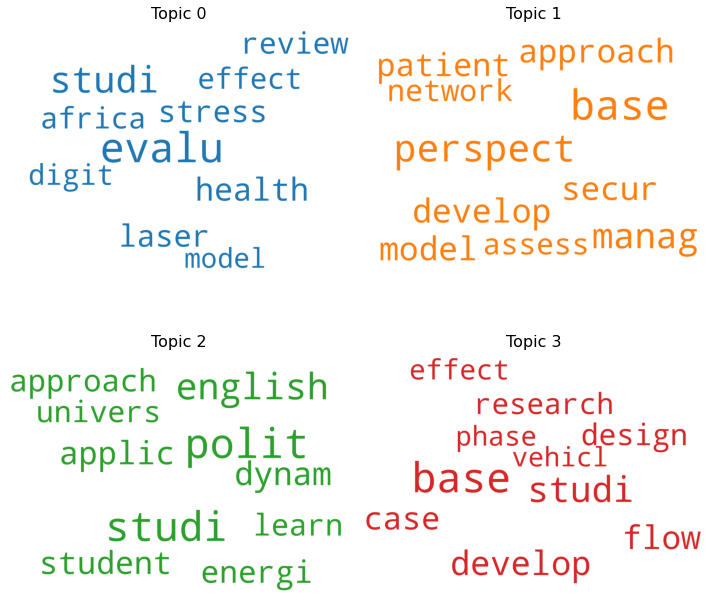

In [ ]:
get_wordcloud(topic= lda_model)

**Running LDA using TF-IDF**

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf,
                                             num_topics=10,
                                             id2word=dictionary,
                                             passes=2,
                                             workers=4)

In [ ]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.010*"flow" + 0.010*"perform" + 0.010*"simul" + 0.008*"model" + 0.008*"design" + 0.007*"analysi" + 0.007*"relat" + 0.007*"intern" + 0.006*"system" + 0.006*"control"
Topic: 1 Word: 0.008*"design" + 0.007*"perspect" + 0.007*"state" + 0.007*"analysi" + 0.006*"industri" + 0.005*"manag" + 0.005*"algorithm" + 0.005*"process" + 0.005*"laser" + 0.005*"sensor"
Topic: 2 Word: 0.011*"model" + 0.007*"manag" + 0.006*"base" + 0.006*"system" + 0.006*"studi" + 0.006*"impact" + 0.005*"learn" + 0.005*"cultur" + 0.005*"layer" + 0.005*"case"
Topic: 3 Word: 0.009*"write" + 0.007*"structur" + 0.006*"intern" + 0.006*"effect" + 0.006*"secur" + 0.006*"develop" + 0.006*"migrat" + 0.006*"vehicl" + 0.005*"imag" + 0.005*"academ"
Topic: 4 Word: 0.009*"review" + 0.007*"method" + 0.007*"space" + 0.007*"para" + 0.006*"program" + 0.006*"impact" + 0.006*"market" + 0.006*"engag" + 0.006*"base" + 0.005*"network"
Topic: 5 Word: 0.008*"effect" + 0.008*"respons" + 0.007*"base" + 0.007*"exercis" + 0.007*"healt

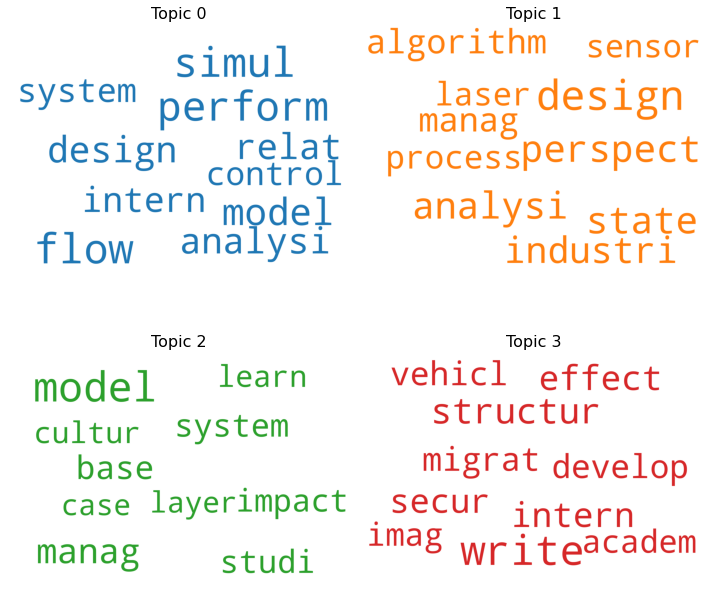

In [ ]:
get_wordcloud(topic= lda_model_tfidf)

**Performance evaluation by classifying sample document using LDA Bag of Words model**

In [ ]:
documents[:311]

,title,index
0,Laser surface engineering: processes and appli...,0
1,Interaction of CO2 laser-modified nylon with o...,1
2,On the use of CO2 laser induced surface patter...,2
3,On the effects of using CO2 and F2 lasers to m...,3
4,Wettability and osteoblast cell response modul...,4
...,...,...
306,"Nutrition security, livelihoods and HIV/AIDS: ...",306
307,"Indigenous Peoples' food systems, nutrition, a...",307
308,Integrated assessment of renewable energy pote...,308
309,"Gender, Nutrition, and the Human Right to Adeq...",309


In [ ]:
processed_docs[311]

['host', 'digest', 'determin', 'popul', 'northern', 'fowl', 'mite']

In [ ]:
processed_docs[4311]

['psychometr',
 'analysi',
 'propos',
 'model',
 'determin',
 'factor',
 'influenc',
 'select',
 'research',
 'supervisor']

In [ ]:
for index, score in sorted(lda_model[bow_corpus[311]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.47559306025505066	 
Topic: 0.016*"food" + 0.013*"studi" + 0.012*"global" + 0.011*"social" + 0.010*"perform" + 0.009*"human" + 0.008*"research" + 0.008*"risk" + 0.008*"local" + 0.007*"south"

Score: 0.324382483959198	 
Topic: 0.027*"model" + 0.014*"learn" + 0.011*"power" + 0.010*"activ" + 0.010*"applic" + 0.010*"perform" + 0.009*"structur" + 0.009*"concret" + 0.008*"base" + 0.008*"physic"

Score: 0.025007003918290138	 
Topic: 0.017*"evalu" + 0.013*"studi" + 0.010*"health" + 0.009*"laser" + 0.009*"stress" + 0.008*"review" + 0.008*"africa" + 0.008*"effect" + 0.008*"digit" + 0.007*"model"

Score: 0.025004100054502487	 
Topic: 0.016*"base" + 0.014*"perspect" + 0.012*"manag" + 0.010*"develop" + 0.010*"model" + 0.010*"approach" + 0.010*"secur" + 0.010*"patient" + 0.009*"network" + 0.008*"assess"

Score: 0.025003962218761444	 
Topic: 0.014*"polit" + 0.013*"studi" + 0.011*"english" + 0.008*"dynam" + 0.008*"applic" + 0.008*"student" + 0.008*"energi" + 0.007*"approach" + 0.007*"learn" +

In [ ]:
for index, score in sorted(lda_model[bow_corpus[4311]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.668431282043457	 
Topic: 0.014*"polit" + 0.013*"studi" + 0.011*"english" + 0.008*"dynam" + 0.008*"applic" + 0.008*"student" + 0.008*"energi" + 0.007*"approach" + 0.007*"learn" + 0.007*"univers"

Score: 0.2315458208322525	 
Topic: 0.016*"base" + 0.014*"perspect" + 0.012*"manag" + 0.010*"develop" + 0.010*"model" + 0.010*"approach" + 0.010*"secur" + 0.010*"patient" + 0.009*"network" + 0.008*"assess"

Score: 0.01250576600432396	 
Topic: 0.021*"base" + 0.015*"studi" + 0.013*"develop" + 0.012*"flow" + 0.012*"case" + 0.010*"design" + 0.010*"research" + 0.009*"effect" + 0.008*"phase" + 0.008*"vehicl"

Score: 0.012504086829721928	 
Topic: 0.016*"food" + 0.013*"studi" + 0.012*"global" + 0.011*"social" + 0.010*"perform" + 0.009*"human" + 0.008*"research" + 0.008*"risk" + 0.008*"local" + 0.007*"south"

Score: 0.012503419071435928	 
Topic: 0.028*"analysi" + 0.014*"network" + 0.011*"model" + 0.011*"manag" + 0.011*"base" + 0.010*"studi" + 0.009*"optim" + 0.009*"experi" + 0.009*"effect" + 0.

**Performance evaluation by classifying sample document using LDA TF-IDF model**

In [ ]:
for index, score in sorted(lda_model_tfidf[bow_corpus[311]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.7749567627906799	 
Topic: 0.010*"flow" + 0.010*"perform" + 0.010*"simul" + 0.008*"model" + 0.008*"design" + 0.007*"analysi" + 0.007*"relat" + 0.007*"intern" + 0.006*"system" + 0.006*"control"

Score: 0.025009702891111374	 
Topic: 0.008*"africa" + 0.008*"product" + 0.008*"polit" + 0.007*"south" + 0.007*"design" + 0.007*"network" + 0.006*"approach" + 0.006*"learn" + 0.006*"manag" + 0.006*"perspect"

Score: 0.025007672607898712	 
Topic: 0.007*"learn" + 0.006*"regul" + 0.006*"effect" + 0.006*"educ" + 0.006*"analysi" + 0.005*"mutat" + 0.005*"communiti" + 0.005*"environment" + 0.005*"activ" + 0.005*"albin"

Score: 0.025005431845784187	 
Topic: 0.009*"write" + 0.007*"structur" + 0.006*"intern" + 0.006*"effect" + 0.006*"secur" + 0.006*"develop" + 0.006*"migrat" + 0.006*"vehicl" + 0.005*"imag" + 0.005*"academ"

Score: 0.025004060938954353	 
Topic: 0.008*"effect" + 0.008*"respons" + 0.007*"base" + 0.007*"exercis" + 0.007*"health" + 0.006*"urban" + 0.006*"studi" + 0.006*"women" + 0.006*

In [ ]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4311]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8874759078025818	 
Topic: 0.010*"develop" + 0.009*"model" + 0.008*"social" + 0.008*"student" + 0.008*"learn" + 0.007*"studi" + 0.007*"experi" + 0.006*"self" + 0.006*"practic" + 0.005*"educ"

Score: 0.01250477321445942	 
Topic: 0.009*"review" + 0.007*"method" + 0.007*"space" + 0.007*"para" + 0.006*"program" + 0.006*"impact" + 0.006*"market" + 0.006*"engag" + 0.006*"base" + 0.005*"network"

Score: 0.012504445388913155	 
Topic: 0.007*"learn" + 0.006*"regul" + 0.006*"effect" + 0.006*"educ" + 0.006*"analysi" + 0.005*"mutat" + 0.005*"communiti" + 0.005*"environment" + 0.005*"activ" + 0.005*"albin"

Score: 0.012504116632044315	 
Topic: 0.011*"model" + 0.007*"manag" + 0.006*"base" + 0.006*"system" + 0.006*"studi" + 0.006*"impact" + 0.005*"learn" + 0.005*"cultur" + 0.005*"layer" + 0.005*"case"

Score: 0.012502453289926052	 
Topic: 0.008*"design" + 0.007*"perspect" + 0.007*"state" + 0.007*"analysi" + 0.006*"industri" + 0.005*"manag" + 0.005*"algorithm" + 0.005*"process" + 0.005*"laser"

**Testing model on unseen document**

In [ ]:
unseen_document = 'Machine learning techniques for automatically extracting contextual information from scientific publications'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.6599664688110352	 Topic: 0.014*"develop" + 0.013*"network" + 0.012*"learn" + 0.011*"detect" + 0.011*"educ"
Score: 0.225717231631279	 Topic: 0.018*"design" + 0.016*"learn" + 0.012*"approach" + 0.012*"system" + 0.011*"model"
Score: 0.014291387982666492	 Topic: 0.016*"base" + 0.014*"perspect" + 0.012*"manag" + 0.010*"develop" + 0.010*"model"
Score: 0.01429032813757658	 Topic: 0.017*"evalu" + 0.013*"studi" + 0.010*"health" + 0.009*"laser" + 0.009*"stress"
Score: 0.014290313236415386	 Topic: 0.028*"analysi" + 0.014*"network" + 0.011*"model" + 0.011*"manag" + 0.011*"base"
Score: 0.01428995467722416	 Topic: 0.021*"base" + 0.015*"studi" + 0.013*"develop" + 0.012*"flow" + 0.012*"case"
Score: 0.014289917424321175	 Topic: 0.027*"model" + 0.014*"learn" + 0.011*"power" + 0.010*"activ" + 0.010*"applic"
Score: 0.014288515783846378	 Topic: 0.020*"develop" + 0.019*"effect" + 0.013*"manag" + 0.012*"review" + 0.011*"analysi"
Score: 0.014288506470620632	 Topic: 0.014*"polit" + 0.013*"studi" + 0.0

In [ ]:
unseen_document = 'Machine learning techniques for automatically extracting contextual information from scientific publications'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))

Score: 0.871392548084259	 Topic: 0.009*"write" + 0.007*"structur" + 0.006*"intern" + 0.006*"effect" + 0.006*"secur"
Score: 0.014295010827481747	 Topic: 0.011*"model" + 0.007*"manag" + 0.006*"base" + 0.006*"system" + 0.006*"studi"
Score: 0.014290881343185902	 Topic: 0.010*"base" + 0.007*"environ" + 0.007*"school" + 0.007*"network" + 0.006*"model"
Score: 0.01429068949073553	 Topic: 0.010*"develop" + 0.009*"model" + 0.008*"social" + 0.008*"student" + 0.008*"learn"
Score: 0.01428982149809599	 Topic: 0.008*"design" + 0.007*"perspect" + 0.007*"state" + 0.007*"analysi" + 0.006*"industri"
Score: 0.014289076440036297	 Topic: 0.007*"learn" + 0.006*"regul" + 0.006*"effect" + 0.006*"educ" + 0.006*"analysi"
Score: 0.014288428239524364	 Topic: 0.009*"review" + 0.007*"method" + 0.007*"space" + 0.007*"para" + 0.006*"program"
Score: 0.014288344420492649	 Topic: 0.010*"flow" + 0.010*"perform" + 0.010*"simul" + 0.008*"model" + 0.008*"design"
Score: 0.014288096688687801	 Topic: 0.008*"africa" + 0.008*"pro